# **DL: FCN of Pima-Indians-Diabetes-Data** 

> https://medium.com/@soumen.atta/analyzing-pima-indians-diabetes-data-using-python-89a021b5f4eb


In [112]:
# Load the required packages 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.3.0


**Load CSV file using Pandas**

In [113]:
# Specify the file name 
url = "https://github.com/Redwoods/Py/raw/master/pdm2020/my-note/py-pandas/data/diabetes.csv"
filename = url
# filename = 'diabetes.csv'  # access to local file

# Read the data 
data = read_csv(filename) 

# Print the shape 
data.shape

(768, 9)

In [114]:
# Print the first 5 rows 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [115]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [116]:
# Split dataset to train & test set
X_train = data.iloc[:600,0:8] # 600, outcome은 '0'/'1'로 나누는 class 이므로 빼준다.
y_train = data.iloc[:600,8]
X_test = data.iloc[600:,0:8] # 168
y_test = data.iloc[600:,8]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((600, 8), (600,), (168, 8), (168,))

In [117]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


In [118]:
# fit the keras model on the dataset
hist = model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1, 
                 validation_data=(X_test, y_test))


Epoch 1/150
60/60 [==============================] - 0s 7ms/step - loss: 8.1726 - accuracy: 0.6417 - val_loss: 5.1712 - val_accuracy: 0.6012
Epoch 2/150
60/60 [==============================] - 0s 1ms/step - loss: 3.1368 - accuracy: 0.6517 - val_loss: 1.9513 - val_accuracy: 0.6250
Epoch 3/150
60/60 [==============================] - 0s 1ms/step - loss: 1.7990 - accuracy: 0.6483 - val_loss: 1.5209 - val_accuracy: 0.6012
Epoch 4/150
60/60 [==============================] - 0s 2ms/step - loss: 1.4168 - accuracy: 0.6267 - val_loss: 1.1748 - val_accuracy: 0.5536
Epoch 5/150
60/60 [==============================] - 0s 1ms/step - loss: 1.1504 - accuracy: 0.6050 - val_loss: 1.0270 - val_accuracy: 0.5417
Epoch 6/150
60/60 [==============================] - 0s 1ms/step - loss: 1.0528 - accuracy: 0.6033 - val_loss: 0.8887 - val_accuracy: 0.6012
Epoch 7/150
60/60 [==============================] - 0s 1ms/step - loss: 0.9329 - accuracy: 0.6350 - val_loss: 0.8042 - val_accuracy: 0.5714
Epoch 8/150
6

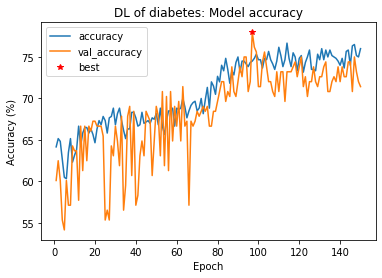

In [119]:
epochs = 150

acc_list = [100 * i for i in hist.history['accuracy']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
loss_list = hist.history['loss'] #[100 * i for i in history.history['loss']]
vloss_list = hist.history['val_loss'] #[100 * i for i in history.history['val_loss']]


plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('DL of diabetes: Model accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')




In [120]:
# model performance
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7143


[0.5724309086799622, 0.7142857313156128]

In [121]:
y_train[:5],y_train.shape

(0    1
 1    0
 2    1
 3    0
 4    1
 Name: Outcome, dtype: int64, (600,))

In [122]:
model.predict(X_train)[0:5],[int(np.round(prob)) for prob in model.predict(X_train)[0:5]] # train data의 초반 5명을 예측(확률값)

(array([[0.49979338],
        [0.07781118],
        [0.7353826 ],
        [0.22246689],
        [0.6603561 ]], dtype=float32), [0, 0, 1, 0, 1])

In [123]:
# the first data in trainset
X_train.iloc[0].tolist()

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [124]:
X_test.shape

(168, 8)

In [125]:
y_test[:10].values

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [126]:
X_test.iloc[0].values.tolist(),y_test.iloc[0]

([1.0, 108.0, 88.0, 19.0, 0.0, 27.1, 0.4, 24.0], 0)

In [127]:
# make class predictions for test data with the model
predictions = [int(np.round(prob)) for prob in model.predict(X_test)]
predictions[:10]

[0, 0, 0, 0, 1, 1, 1, 0, 0, 0]

In [128]:
# summarize the first 10 cases in testset
for i in range(10):
   print('%s => %d (expected %d)' % (X_test.iloc[i].values.tolist(), predictions[i], y_test.iloc[i]))

[1.0, 108.0, 88.0, 19.0, 0.0, 27.1, 0.4, 24.0] => 0 (expected 0)
[6.0, 96.0, 0.0, 0.0, 0.0, 23.7, 0.19, 28.0] => 0 (expected 0)
[1.0, 124.0, 74.0, 36.0, 0.0, 27.8, 0.1, 30.0] => 0 (expected 0)
[7.0, 150.0, 78.0, 29.0, 126.0, 35.2, 0.6920000000000001, 54.0] => 0 (expected 1)
[4.0, 183.0, 0.0, 0.0, 0.0, 28.4, 0.212, 36.0] => 1 (expected 1)
[1.0, 124.0, 60.0, 32.0, 0.0, 35.8, 0.514, 21.0] => 1 (expected 0)
[1.0, 181.0, 78.0, 42.0, 293.0, 40.0, 1.258, 22.0] => 1 (expected 1)
[1.0, 92.0, 62.0, 25.0, 41.0, 19.5, 0.48200000000000004, 25.0] => 0 (expected 0)
[0.0, 152.0, 82.0, 39.0, 272.0, 41.5, 0.27, 27.0] => 0 (expected 0)
[1.0, 111.0, 62.0, 13.0, 182.0, 24.0, 0.138, 23.0] => 0 (expected 0)


### Confusion matrix

In [129]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [130]:
cm = confusion_matrix(y_test, predictions)

In [131]:
class_names = ['noDM','DM']

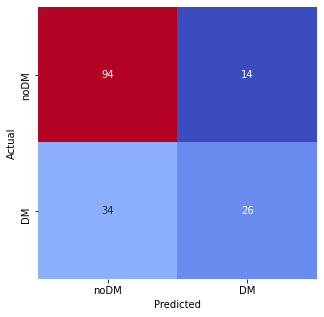

In [132]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## [DIY-1] Save the best model
- hdf5 file

In [133]:
# define the keras model
model2 = Sequential([
    Dense(16, input_dim=8, activation='relu'),
    Dense(8, activation='relu'), 
    Dense(1, activation='sigmoid')                 
])
# compile the keras model
model2.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


### callbacks

In [134]:
cp_callback = callbacks.ModelCheckpoint(filepath="./diabetes_DL_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [135]:
# fit the keras model on the dataset
hist = model2.fit(X_train, y_train, epochs=500, batch_size=10, verbose=1, 
                  callbacks=[cp_callback, es_callback], 
                  validation_data=(X_test, y_test))


Epoch 1/500
60/60 [==============================] - 0s 4ms/step - loss: 1.7609 - accuracy: 0.5683 - val_loss: 1.0584 - val_accuracy: 0.5893
Epoch 2/500
60/60 [==============================] - 0s 2ms/step - loss: 1.0213 - accuracy: 0.6417 - val_loss: 0.9578 - val_accuracy: 0.5417
Epoch 3/500
60/60 [==============================] - 0s 2ms/step - loss: 0.8877 - accuracy: 0.6383 - val_loss: 0.7884 - val_accuracy: 0.6131
Epoch 4/500
60/60 [==============================] - 0s 1ms/step - loss: 0.7774 - accuracy: 0.6767 - val_loss: 0.7643 - val_accuracy: 0.5833
Epoch 5/500
60/60 [==============================] - 0s 1ms/step - loss: 0.7362 - accuracy: 0.6500 - val_loss: 0.7572 - val_accuracy: 0.5714
Epoch 6/500
60/60 [==============================] - 0s 2ms/step - loss: 0.7172 - accuracy: 0.6450 - val_loss: 0.7019 - val_accuracy: 0.5536
Epoch 7/500
60/60 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.6500 - val_loss: 0.6819 - val_accuracy: 0.5774
Epoch 8/500
6

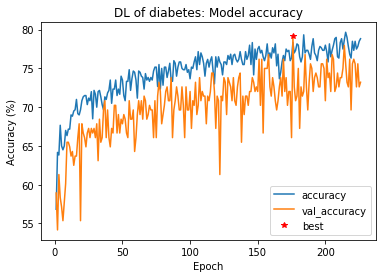

In [136]:
epochs = 226

acc_list = [100 * i for i in hist.history['accuracy']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
loss_list = hist.history['loss'] #[100 * i for i in history.history['loss']]
vloss_list = hist.history['val_loss'] #[100 * i for i in history.history['val_loss']]


plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('DL of diabetes: Model accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')




### best model
> diabetes_DL_best_weights.176-0.7917.hdf5

In [137]:
# model2 performance
model2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.7321


[0.5578176379203796, 0.7321428656578064]

In [138]:
from keras.models import load_model

# model = load_model('your_best_model.hdf5')
model2_best = load_model('diabetes_DL_best_weights.176-0.7917.hdf5')
model2_best.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.7917


[0.5436846613883972, 0.7916666865348816]

### Confusion matrix

In [139]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [140]:
predictions = [int(np.round(prob)) for prob in model2_best.predict(X_test)]

In [141]:
cm = confusion_matrix(y_test, predictions)

In [142]:
class_names = ['noDM','DM']

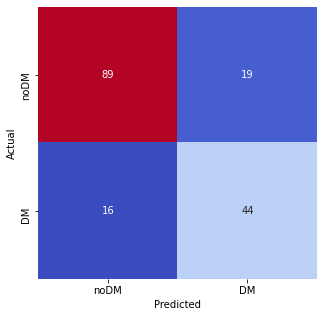

In [143]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

***

## [DIY-2] 데이터 전처리 후 딥러닝 모델 만들어서 평가

## Check data
- null
- NaN

In [144]:
# Check NaN
# data.isna().sum()
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 과연 diabetes 데이터는 문제가 없는가?

- 각 항목에서 0이 허용되지 않는 경우에 0이 있다면 => 문제 있는 데이터!
- Pregnancies, Outcome은 0이 가능한 값이므로 제외하고 0이 있는 항목(column) 조사

In [145]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [146]:
# Pregnancies, Outcome은 0이 가능한 값이므로 제외하고 0이 있는 항목(column) 조사
columns_with_zero = data.columns[(data==0).sum() > 0][1:-1]
columns_with_zero

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [147]:
# Clean the data : zero2median()
# 1. Check zeros in features with Pregnancies, Outcome excluded.
# 2. Replace zero with NaN 
# 3. Replace NaN with the median of the corresponding featurs
def zero2median(df):
    columns_with_zero = df.columns[(df==0).sum() > 0][1:-1]
    # Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')
    df[columns_with_zero]=df[columns_with_zero].replace(0,np.nan)
    for feature in columns_with_zero:
        df[feature].fillna(df[feature].median(),inplace=True)
    
    return df

# Make clean dataframe, data2 from data
data2 = zero2median(data)

In [148]:
data2.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


## [DIY] 전처리된 데이터프레임 data2를 이용해서 FCN으로 best model을 찾으시오.
- best model: hdf5 file
- Accuracy graph
- Confusion matrix graph

In [149]:
# Split dataset to train & test set
X_train = data2.iloc[:600,0:8] # 600, outcome은 '0'/'1'로 나누는 class 이므로 빼준다.
y_train = data2.iloc[:600,8]
X_test = data2.iloc[600:,0:8] # 168
y_test = data2.iloc[600:,8]
X_train.shape,y_train.shape,X_test.shape,y_test.shape



((600, 8), (600,), (168, 8), (168,))

In [150]:
# define the keras model
model3 = Sequential([
    Dense(16, input_dim=8, activation='relu'),
    Dense(8, activation='relu'), 
    Dense(1, activation='sigmoid')                 
])
# compile the keras model
model3.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [151]:
cp_callback = callbacks.ModelCheckpoint(filepath="./diabetes_2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [152]:
# fit the keras model on the dataset
hist = model3.fit(X_train, y_train, epochs=500, batch_size=10, verbose=1, 
                  callbacks=[cp_callback, es_callback], 
                  validation_data=(X_test, y_test))

Epoch 1/500
60/60 [==============================] - 0s 4ms/step - loss: 1.4391 - accuracy: 0.4750 - val_loss: 0.8530 - val_accuracy: 0.5536
Epoch 2/500
60/60 [==============================] - 0s 2ms/step - loss: 0.8461 - accuracy: 0.6017 - val_loss: 0.7215 - val_accuracy: 0.4881
Epoch 3/500
60/60 [==============================] - 0s 2ms/step - loss: 0.7430 - accuracy: 0.6217 - val_loss: 0.6671 - val_accuracy: 0.6190
Epoch 4/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6550 - val_loss: 0.6797 - val_accuracy: 0.5833
Epoch 5/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.6633 - val_loss: 0.6327 - val_accuracy: 0.6488
Epoch 6/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.6800 - val_loss: 0.6217 - val_accuracy: 0.6964
Epoch 7/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.6683 - val_loss: 0.6337 - val_accuracy: 0.6488
Epoch 8/500
6

### Accuracy graph

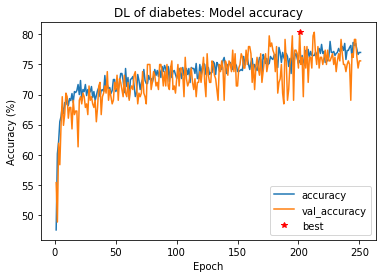

In [153]:
epochs = 251

acc_list = [100 * i for i in hist.history['accuracy']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
loss_list = hist.history['loss'] #[100 * i for i in history.history['loss']]
vloss_list = hist.history['val_loss'] #[100 * i for i in history.history['val_loss']]


plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('DL of diabetes: Model accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')

### best model
> diabetes_2_best_weights.203-0.8274.hdf5

In [154]:
# model3 performance
model3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7560


[0.520013153553009, 0.7559523582458496]

In [155]:
from keras.models import load_model

model3_best = load_model('diabetes_2_best_weights.203-0.8274.hdf5')
model3_best.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5237 - accuracy: 0.8274


[0.5237209796905518, 0.8273809552192688]

### Confusion matrix

In [156]:
predictions = [int(np.round(prob)) for prob in model3_best.predict(X_test)]

In [157]:
cm = confusion_matrix(y_test, predictions)

In [158]:
class_names = ['noDM','DM']

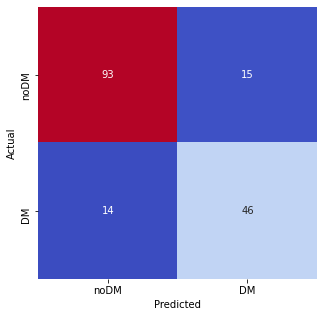

In [159]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()